## Impact of COVID19

### EDA

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("data/ImpactCOVID.csv")
df

,UniqueID,Sex,Age,Marital,Education,Employment,Income,NumRooms,FamilyImpact,PsychoImpact,EconomicImpact
0,434,Male,26,Single,Graduates,Unemployed,No Income,1,0.000000,9.230769,60
1,747,Male,29,Single,Graduates,Employed (govt or private),3201-7800,1,7.272727,12.307693,66
2,750,Male,21,Single,Grade 9-12,"Other (student, retired, housewife)",No Income,2,5.454545,12.307693,72
3,257,Female,28,Married,Grade 1-8,Unemployed,No Income,1,5.454545,13.846154,44
4,179,Female,29,Single,Graduates,Employed (govt or private),1651-3200,1,7.272727,18.461538,50
...,...,...,...,...,...,...,...,...,...,...,...
757,715,Female,32,Married,Grade 1-8,Unemployed,No Income,1,49.090908,44.615383,72
758,716,Male,32,Married,Graduates,Employed (govt or private),1651-3200,2,49.090908,44.615383,56
759,717,Female,24,Married,Grade 1-8,Laid off due to COVID-19,No Income,1,49.090908,46.153847,60
760,450,Male,30,Single,Graduates,Employed (govt or private),>=7801,1,60.000000,13.846154,52


In [3]:
## check for number of variables and observations
df.shape

(762, 11)

In [4]:
## check missing values
df.isna().sum()

UniqueID          0
Sex               0
Age               0
Marital           0
Education         0
Employment        0
Income            0
NumRooms          0
FamilyImpact      0
PsychoImpact      0
EconomicImpact    0
dtype: int64

In [5]:
## check duplicates
df.duplicated(subset=['UniqueID']).sum()

0

In [6]:
## check for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UniqueID        762 non-null    int64  
 1   Sex             762 non-null    object 
 2   Age             762 non-null    int64  
 3   Marital         762 non-null    object 
 4   Education       762 non-null    object 
 5   Employment      762 non-null    object 
 6   Income          762 non-null    object 
 7   NumRooms        762 non-null    int64  
 8   FamilyImpact    762 non-null    float64
 9   PsychoImpact    762 non-null    float64
 10  EconomicImpact  762 non-null    int64  
dtypes: float64(2), int64(4), object(5)
memory usage: 65.6+ KB


In [7]:
## check unique values for each variable
df.nunique()

UniqueID          762
Sex                 2
Age                58
Marital             3
Education           4
Employment          5
Income              6
NumRooms            9
FamilyImpact       33
PsychoImpact       47
EconomicImpact     33
dtype: int64

In [8]:
## Descriptive stat

df.describe()

,UniqueID,Age,NumRooms,FamilyImpact,PsychoImpact,EconomicImpact
count,762.000000,762.000000,762.000000,762.000000,762.000000,762.000000
mean,410.456693,37.780840,1.912073,28.649487,22.570160,53.574803
std,236.563191,13.187738,1.170772,13.967132,15.530124,12.651928
min,1.000000,18.000000,1.000000,0.000000,0.000000,8.000000
25%,205.250000,28.000000,1.000000,18.181818,10.769231,44.000000
50%,411.500000,35.000000,2.000000,25.454546,16.923077,54.000000
75%,614.750000,45.000000,2.000000,38.181820,32.307693,64.000000
max,817.000000,85.000000,9.000000,61.818180,80.000000,80.000000


In [9]:
## Number of catgorical and numerical features
categirical_features = [f for f in df.columns if df[f].dtype == "O"] # "O" -> Object
num_categirical_features = len(categirical_features)
numeric_features = [f for f in df.columns if df[f].dtype != "O"]
num_numeric_features = len(numeric_features)

print(num_categirical_features, categirical_features)
print(num_numeric_features, numeric_features)

5 ['Sex', 'Marital', 'Education', 'Employment', 'Income']
6 ['UniqueID', 'Age', 'NumRooms', 'FamilyImpact', 'PsychoImpact', 'EconomicImpact']


In [10]:
categorical_features = df.select_dtypes(include="object").columns
print(categorical_features)
numeric_features = df.select_dtypes(exclude="object").columns
print(numeric_features)

Index(['Sex', 'Marital', 'Education', 'Employment', 'Income'], dtype='object')
Index(['UniqueID', 'Age', 'NumRooms', 'FamilyImpact', 'PsychoImpact',
       'EconomicImpact'],
      dtype='object')


### Histogram and KDE

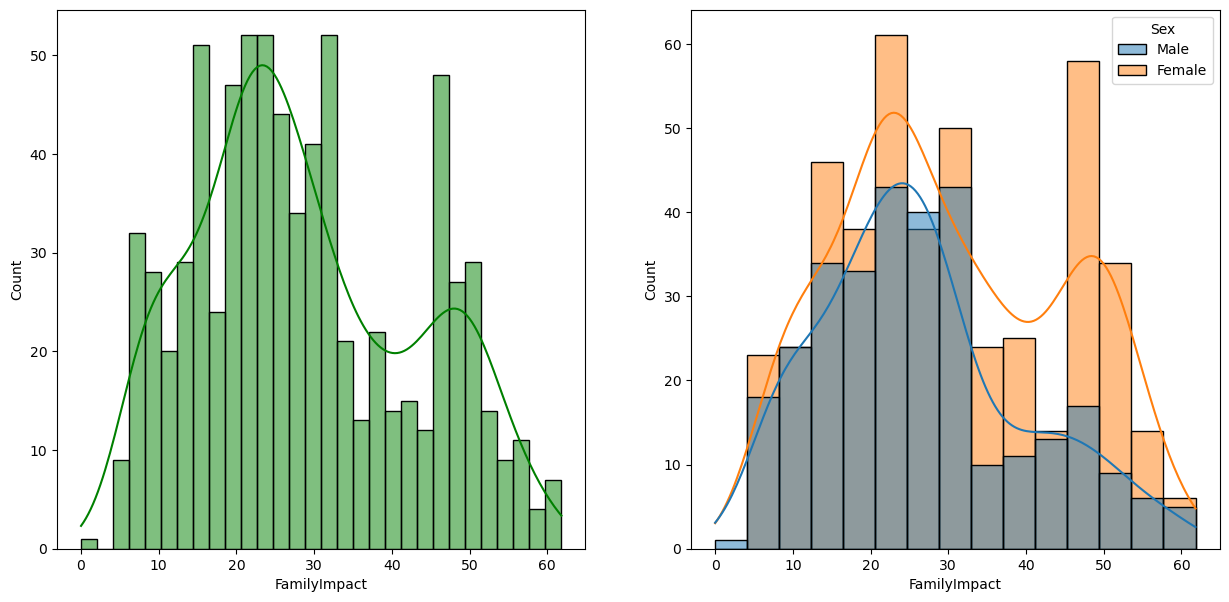

In [11]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='FamilyImpact', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='FamilyImpact', kde=True, hue='Sex')
plt.show()

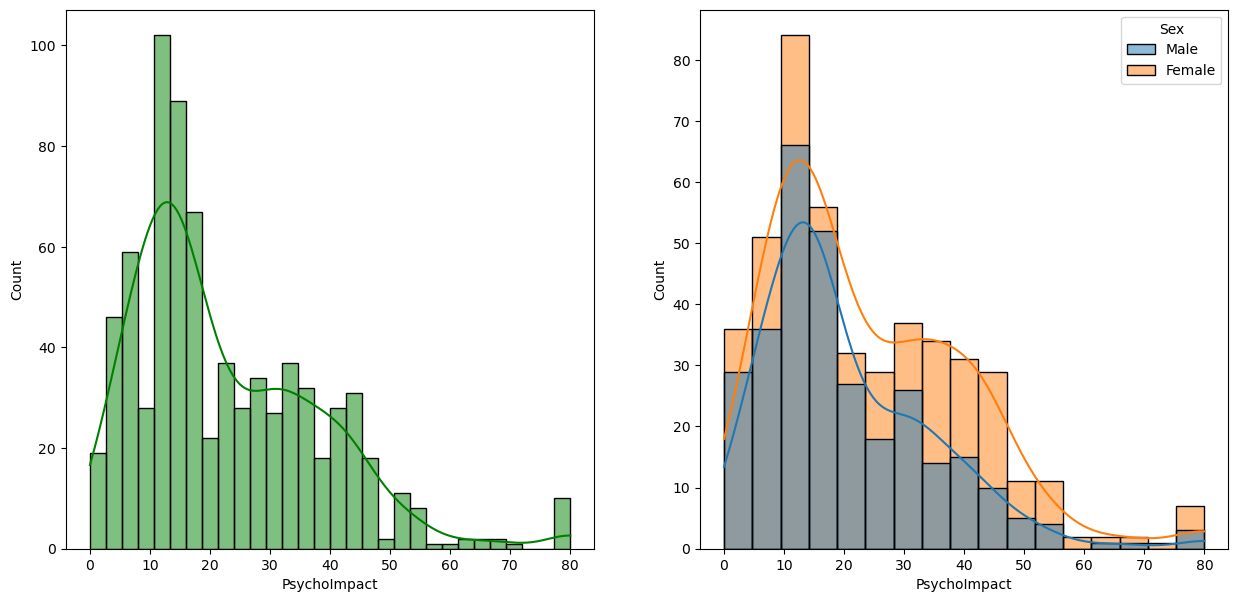

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='PsychoImpact', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='PsychoImpact', kde=True, hue='Sex')
plt.show()

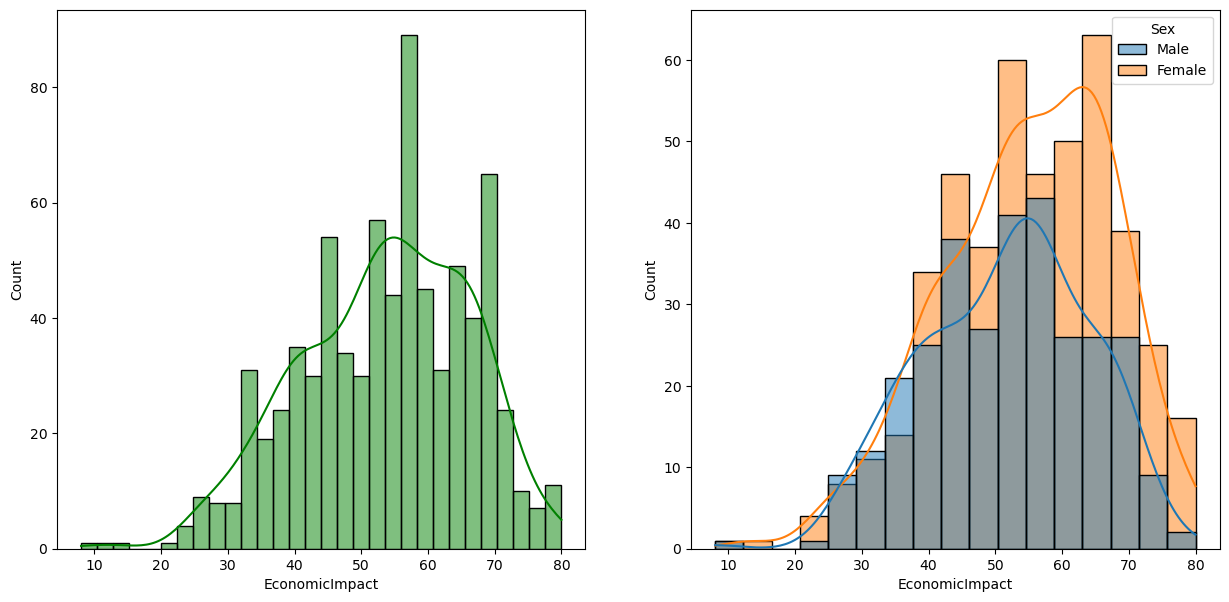

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df, x='EconomicImpact', bins=30, kde=True, color='g')
plt.subplot(122)
sns.histplot(data=df, x='EconomicImpact', kde=True, hue='Sex')
plt.show()

* Females are more affected by COVID19 than males

### Modeling

In [14]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [15]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [17]:
X = df.drop(columns=["UniqueID", "FamilyImpact", "PsychoImpact", "EconomicImpact"])
X

,Sex,Age,Marital,Education,Employment,Income,NumRooms
0,Male,26,Single,Graduates,Unemployed,No Income,1
1,Male,29,Single,Graduates,Employed (govt or private),3201-7800,1
2,Male,21,Single,Grade 9-12,"Other (student, retired, housewife)",No Income,2
3,Female,28,Married,Grade 1-8,Unemployed,No Income,1
4,Female,29,Single,Graduates,Employed (govt or private),1651-3200,1
...,...,...,...,...,...,...,...
757,Female,32,Married,Grade 1-8,Unemployed,No Income,1
758,Male,32,Married,Graduates,Employed (govt or private),1651-3200,2
759,Female,24,Married,Grade 1-8,Laid off due to COVID-19,No Income,1
760,Male,30,Single,Graduates,Employed (govt or private),>=7801,1


In [18]:
y = df["EconomicImpact"]
y

0      60
1      66
2      72
3      44
4      50
       ..
757    72
758    56
759    60
760    52
761    40
Name: EconomicImpact, Length: 762, dtype: int64

### Feature Transformations

In [19]:
cat_features = X.select_dtypes(include="object").columns
num_features = X.select_dtypes(exclude="object").columns

In [20]:
cat_features, num_features

(Index(['Sex', 'Marital', 'Education', 'Employment', 'Income'], dtype='object'),
 Index(['Age', 'NumRooms'], dtype='object'))

In [21]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [22]:
numeric_transformer = StandardScaler()
onehot_transformer = OneHotEncoder()

In [23]:
print(numeric_transformer, onehot_transformer)

StandardScaler() OneHotEncoder()


In [24]:
preprocessor = ColumnTransformer([
    ("OneHotEncoder", onehot_transformer, cat_features),
    ("StandardScaler", numeric_transformer, num_features)
    ])

In [25]:
X = preprocessor.fit_transform(X)
X

array([[ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -0.89390447, -0.77954733],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.66627101, -0.77954733],
       [ 0.        ,  1.        ,  0.        , ...,  1.        ,
        -1.27329358,  0.07515061],
       ...,
       [ 1.        ,  0.        ,  1.        , ...,  1.        ,
        -1.04566012, -0.77954733],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.59039318, -0.77954733],
       [ 0.        ,  1.        ,  0.        , ...,  0.        ,
        -0.21100407, -0.77954733]])

In [26]:
X.shape

(762, 22)

### Train and Test Split

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y, 
    test_size=0.2, 
    random_state=42
)
X_train.shape, X_test.shape

((609, 22), (153, 22))

In [28]:
def evaluate_model(actual, predicted):
    MAE = mean_absolute_error(actual, predicted)
    MSE = mean_squared_error(actual, predicted)
    RMSE = np.sqrt(MSE)
    R2 = r2_score(actual, predicted)    
    return MAE, MSE, RMSE, R2

In [29]:
models = {
    ## Linear models
    "Linear" : LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "ElasticNet" : ElasticNet(),
    ## Tree-based regressions
    "K-Neighbors" : KNeighborsRegressor(),
    "Decision Tree" : DecisionTreeRegressor(),
    "Random Forest" : RandomForestRegressor(),
    "XGBoost" : XGBRegressor(),
    "CatBoosting" : CatBoostRegressor(verbose=False),
    "AdaBoost": AdaBoostRegressor(),
    "Gradient Boosting": GradientBoostingRegressor()
}

In [30]:
num_models = len(models)
model_type = list(models.keys())
model_type

['Linear',
 'Lasso',
 'Ridge',
 'ElasticNet',
 'K-Neighbors',
 'Decision Tree',
 'Random Forest',
 'XGBoost',
 'CatBoosting',
 'AdaBoost',
 'Gradient Boosting']

In [31]:
models = list(models.values())
models

[LinearRegression(),
 Lasso(),
 Ridge(),
 ElasticNet(),
 KNeighborsRegressor(),
 DecisionTreeRegressor(),
 RandomForestRegressor(),
 XGBRegressor(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...),
 AdaBoostRegressor(),
 GradientBoostingRegressor()]

In [32]:
train_MAEs = []
train_RMSEs = []
train_R2s = []

test_MAEs = []
test_RMSEs = []
test_R2s = []

for model in models:
    ## Train model
    model.fit(X_train, y_train)
    ## Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    ## Evaluate train and test
    train_mae, _, train_rmse, train_r2 = evaluate_model(y_train, y_train_pred)
    test_mae, _, test_rmse, test_r2 = evaluate_model(y_test, y_test_pred)
    ## Append results
    train_MAEs.append(train_mae)
    train_RMSEs.append(train_rmse)
    train_R2s.append(train_r2)

    test_MAEs.append(test_mae)
    test_RMSEs.append(test_rmse)
    test_R2s.append(test_r2)

In [33]:
results = pd.DataFrame(
    list(zip(model_type, 
             train_MAEs, train_RMSEs, train_R2s,
             test_MAEs, test_RMSEs, test_R2s)),
    columns=["Model",
             "Train_MAE", "Train_RMSE", "Train_R2",
             "Test_MAE", "Test_RMSE", "Test_R2"]
).sort_values(by=["Test_R2"],ascending=False)
results

,Model,Train_MAE,Train_RMSE,Train_R2,Test_MAE,Test_RMSE,Test_R2
2,Ridge,9.753016,11.972291,0.107972,9.469648,11.921514,0.085025
0,Linear,9.750650,11.972209,0.107984,9.467184,11.923153,0.084773
9,AdaBoost,9.810622,11.790145,0.134908,9.916215,12.103501,0.056876
1,Lasso,10.259094,12.484249,0.030051,9.879699,12.251038,0.033744
3,ElasticNet,10.226958,12.440502,0.036837,9.887024,12.275031,0.029955
10,Gradient Boosting,7.960092,9.802844,0.401963,9.803986,12.494274,-0.005006
4,K-Neighbors,8.727750,10.844850,0.268067,10.062745,12.614381,-0.024421
8,CatBoosting,4.620773,6.056803,0.771697,10.199403,13.313908,-0.141189
6,Random Forest,3.901563,5.024242,0.842904,10.200651,13.495999,-0.172618
7,XGBoost,1.562568,2.777203,0.952000,11.564552,14.976465,-0.443993
